# Capítulo 7 – O Método do Lugar das Raízes

## Estudo Dirigido com Resumo, Simulações em Python e Recursos Adicionais

### 1. Resumo Estruturado do Capítulo

#### 1.1 Introdução
O método do lugar das raízes é uma técnica gráfica para analisar como as raízes da equação característica de um sistema de controle se deslocam no plano **s** à medida que um parâmetro (geralmente o ganho **K**) varia. Ele foi desenvolvido por **Evans (1948)** e permite avaliar estabilidade e desempenho dinâmico.

#### 1.2 Conceito e Condições do Lugar das Raízes
Para um sistema com realimentação unitária e função de transferência de malha aberta **KG(s)**, a equação característica é:

\[
1 + KG(s) = 0
\]

As condições de módulo e ângulo para um ponto **s** pertencer ao lugar das raízes são:

\[
|KG(s)| = 1 \quad \text{e} \quad \angle KG(s) = 180^\circ \pm k \cdot 360^\circ
\]

#### 1.3 Procedimento de 12 Passos para Esboçar o Lugar das Raízes
O livro apresenta um roteiro sistemático:

1. **Escrever** a equação característica na forma `1 + KP(s) = 0`.
2. **Fatorar** `P(s)` em polos e zeros.
3. **Marcar** polos (×) e zeros (○) no plano s.
4. **Determinar** segmentos do eixo real que pertencem ao lugar.
5. **Determinar** o número de ramos (igual ao número de polos).
6. **Simetria**: O lugar é simétrico em relação ao eixo real.
7. **Calcular assíntotas** para ramos que vão para infinito:

   \[
   \sigma_A = \frac{\sum \text{polos} - \sum \text{zeros}}{n_p - n_z}, \quad \phi_A = \frac{(2q+1)180^\circ}{n_p - n_z}
   \]

8. **Determinar** cruzamento com o eixo imaginário (critério de Routh-Hurwitz).
9. **Calcular** pontos de saída/chegada no eixo real (máximo/mínimo de `K = p(s)`).
10. **Determinar** ângulos de partida/chegada em polos/zeros complexos.
11. **Verificar** pontos que satisfazem a condição de ângulo.
12. **Calcular** o ganho K em pontos específicos usando a condição de módulo.

#### 1.4 Exemplos de Aplicação
- **Sistema de 2ª ordem**: Ilustração básica do lugar.
- **Sistema de 4ª ordem**: Uso de assíntotas, ponto de saída e ângulos de partida.
- **Projeto de controlador PID**: Introdução de zeros e polos para ajustar a resposta.

#### 1.5 Sensibilidade das Raízes
A sensibilidade de uma raiz \( r_i \) em relação a um parâmetro \( K \) é definida como:

\[
S_K^{r_i} = \frac{\partial r_i}{\partial K / K}
\]

Ela mede como variações paramétricas afetam a localização das raízes.

#### 1.6 Uso do MATLAB
Funções como `rlocus`, `rlocfind` e `residue` são usadas para:
- Traçar lugares das raízes
- Encontrar ganhos específicos
- Expandir em frações parciais

#### 1.7 Exemplo de Projeto Sequencial: Acionador de Disco
Aplicação do método para projetar um controlador **PD** que atenda a especificações de:
- Tempo de assentamento
- Sobressinal (overshoot)
- Rejeição a perturbações

---

## 🎯 Pontos Chave para Memorização

### ✅ Vantagens do Método
- **Visualização gráfica** intuitiva da estabilidade
- **Projeto direto** de controladores (P, PI, PD, PID)
- **Análise rápida** do efeito de parâmetros ajustáveis
- **Compreensão profunda** da dinâmica do sistema

### ⚠️ Limitações
- Aplicável apenas a **sistemas lineares**
- Requer **funções de transferência racionais**
- Análise **qualitativa** necessita validação numérica

### 🔧 Aplicações Práticas
| Área | Aplicação |
|------|-----------|
| **Industrial** | Controle de processos, motores, temperatura |
| **Aeroespacial** | Controle de altitude, direção, estabilização |
| **Robótica** | Posicionamento, controle de força |
| **Eletrônica** | Filtros, osciladores, circuitos de controle |

---

## 📊 Tabela: Resumo dos 12 Passos

| Passo | Descrição | Fórmula/Regra |
|-------|-----------|---------------|
| 1 | Forma padrão | `1 + KP(s) = 0` |
| 2 | Fatoração | `P(s) = Π(s+zᵢ)/Π(s+pⱼ)` |
| 3 | Marcadores | × (polos), ○ (zeros) |
| 4 | Eixo real | À esquerda de número ímpar |
| 5 | Nº ramos | = nº de polos |
| 6 | Simetria | Em relação ao eixo real |
| 7 | Assíntotas | `σₐ = (Σp - Σz)/(n-m)`, `φₐ = (2q+1)180°/(n-m)` |
| 8 | Eixo imaginário | Routh-Hurwitz |
| 9 | Saída/entrada | `dK/ds = 0` |
| 10 | Ângulos | Condição de fase em complexos |
| 11 | Verificação | Satisfazer `∠P(s) = 180°±k360°` |
| 12 | Cálculo de K | `K = 1/|P(sₓ)|` |


EXEMPLO 1: Sistema de 2ª Ordem - G(s) = K / [s(s+2)]
Função de Transferência: <TransferFunction>: sys[3297]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      1
  ---------
  s^2 + 2 s
Polos em malha aberta: [-2.+0.j  0.+0.j]


/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")


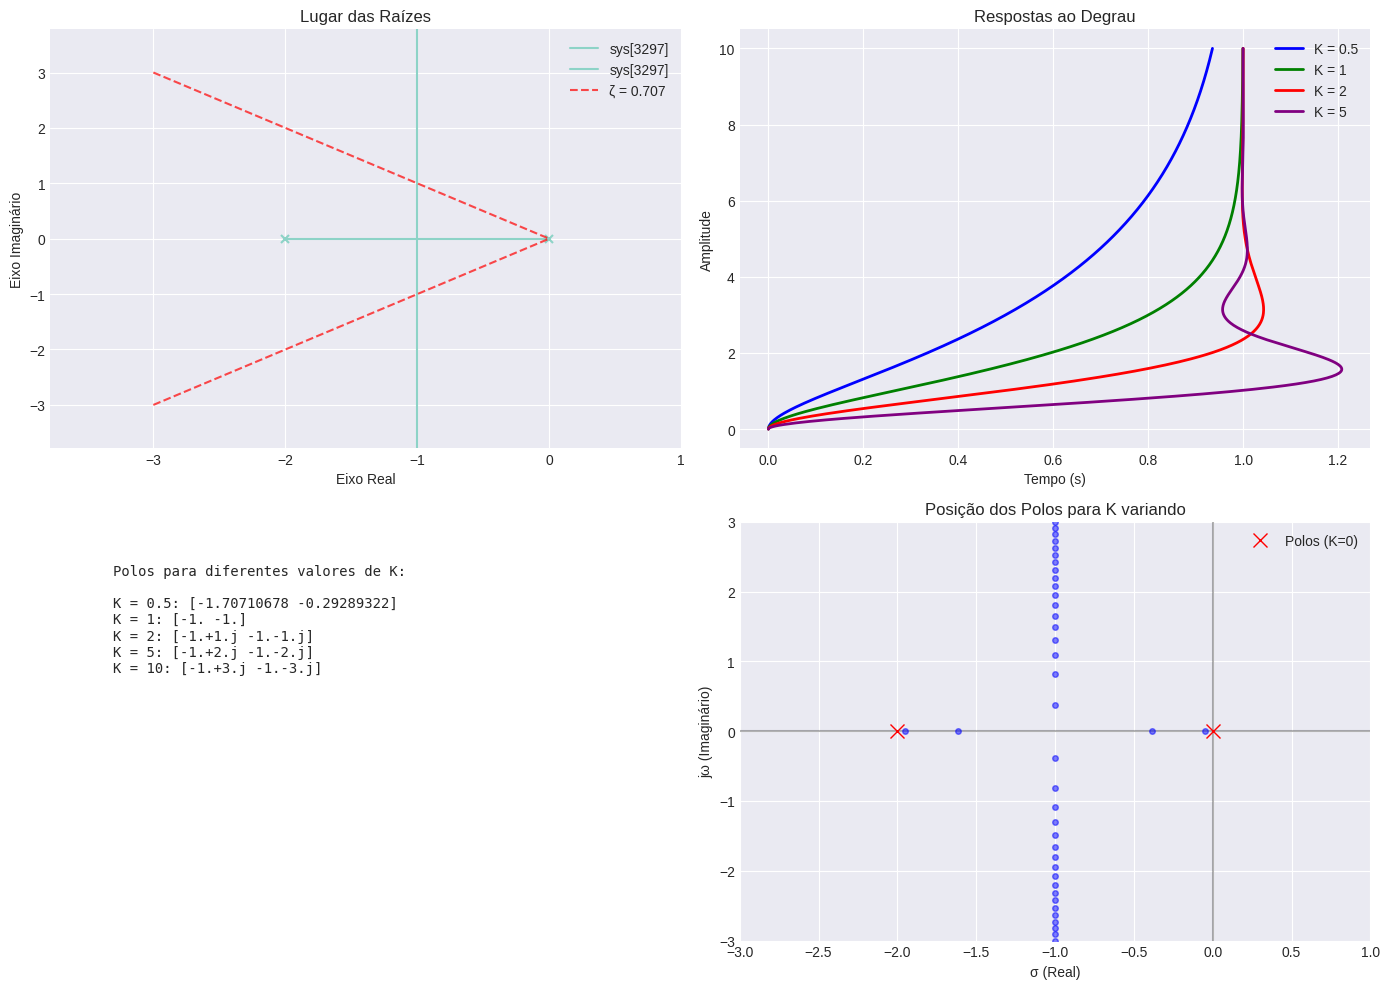

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as cm
import sympy as sp

# Configuração dos gráficos
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================================================
# EXEMPLO 1: Sistema de 2ª Ordem Básico
# G(s) = K / [s(s+2)]
# ============================================================================

print("=" * 70)
print("EXEMPLO 1: Sistema de 2ª Ordem - G(s) = K / [s(s+2)]")
print("=" * 70)

num1 = [1]  # Numerador
den1 = [1, 2, 0]  # s(s+2) = s² + 2s
sys1 = cm.tf(num1, den1)

print(f"Função de Transferência: {sys1}")
print(f"Polos em malha aberta: {cm.pole(sys1)}")

# Criar figura com múltiplos subplots
fig1, axs1 = plt.subplots(2, 2, figsize=(14, 10))

# 1. Lugar das raízes
cm.rlocus(sys1, ax=axs1[0, 0], grid=True)
axs1[0, 0].set_title('Lugar das Raízes')
axs1[0, 0].set_xlabel('Eixo Real')
axs1[0, 0].set_ylabel('Eixo Imaginário')

# Adicionar linha de ζ = 0.707 (45°)
theta = np.arccos(0.707)
x_line = np.linspace(-3, 0, 100)
y_line = x_line * np.tan(theta)
axs1[0, 0].plot(x_line, y_line, 'r--', alpha=0.7, label='ζ = 0.707')
axs1[0, 0].plot(x_line, -y_line, 'r--', alpha=0.7)
axs1[0, 0].legend()

# 2. Respostas ao degrau para diferentes valores de K
K_values = [0.5, 1, 2, 5]
colors = ['blue', 'green', 'red', 'purple']

for K, color in zip(K_values, colors):
    sys_cl = cm.feedback(K * sys1, 1)
    t, y = cm.step(sys_cl, T=np.linspace(0, 10, 500))
    axs1[0, 1].plot(t, y, color=color, linewidth=2, label=f'K = {K}')

axs1[0, 1].set_title('Respostas ao Degrau')
axs1[0, 1].set_xlabel('Tempo (s)')
axs1[0, 1].set_ylabel('Amplitude')
axs1[0, 1].legend()
axs1[0, 1].grid(True)

# 3. Polos para diferentes valores de K (tabela visual)
axs1[1, 0].axis('off')
pole_table_text = "Polos para diferentes valores de K:\n\n"
for K in [0.5, 1, 2, 5, 10]:
    poles = np.roots([1, 2, K])
    pole_table_text += f"K = {K}: {poles}\n"
axs1[1, 0].text(0.1, 0.9, pole_table_text, fontsize=10,
                verticalalignment='top', family='monospace')

# 4. Mapa de polos no plano s
axs1[1, 1].set_xlim([-3, 1])
axs1[1, 1].set_ylim([-3, 3])
axs1[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axs1[1, 1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axs1[1, 1].set_title('Posição dos Polos para K variando')
axs1[1, 1].set_xlabel('σ (Real)')
axs1[1, 1].set_ylabel('jω (Imaginário)')

# Plotar polos para diferentes K
for K in np.linspace(0.1, 10, 20):
    poles = np.roots([1, 2, K])
    axs1[1, 1].plot(poles.real, poles.imag, 'bo', alpha=0.5, markersize=4)

# Polos originais (K=0)
axs1[1, 1].plot([0, -2], [0, 0], 'rx', markersize=10, label='Polos (K=0)')
axs1[1, 1].legend()

plt.tight_layout()
plt.show()


EXEMPLO 2: Sistema de 3ª Ordem com Zero
G(s)H(s) = K(s+1) / [s(s+2)(s+3)]
Função de Transferência: <TransferFunction>: sys[3318]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        s + 1
  -----------------
  s^3 + 5 s^2 + 6 s
Polos: [-3.+0.j -2.+0.j  0.+0.j]
Zeros: [-1.+0.j]

Análise dos Pontos de Saída:
  s = -2.466, K = 0.419

K no ponto de saída: 0.419


/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")


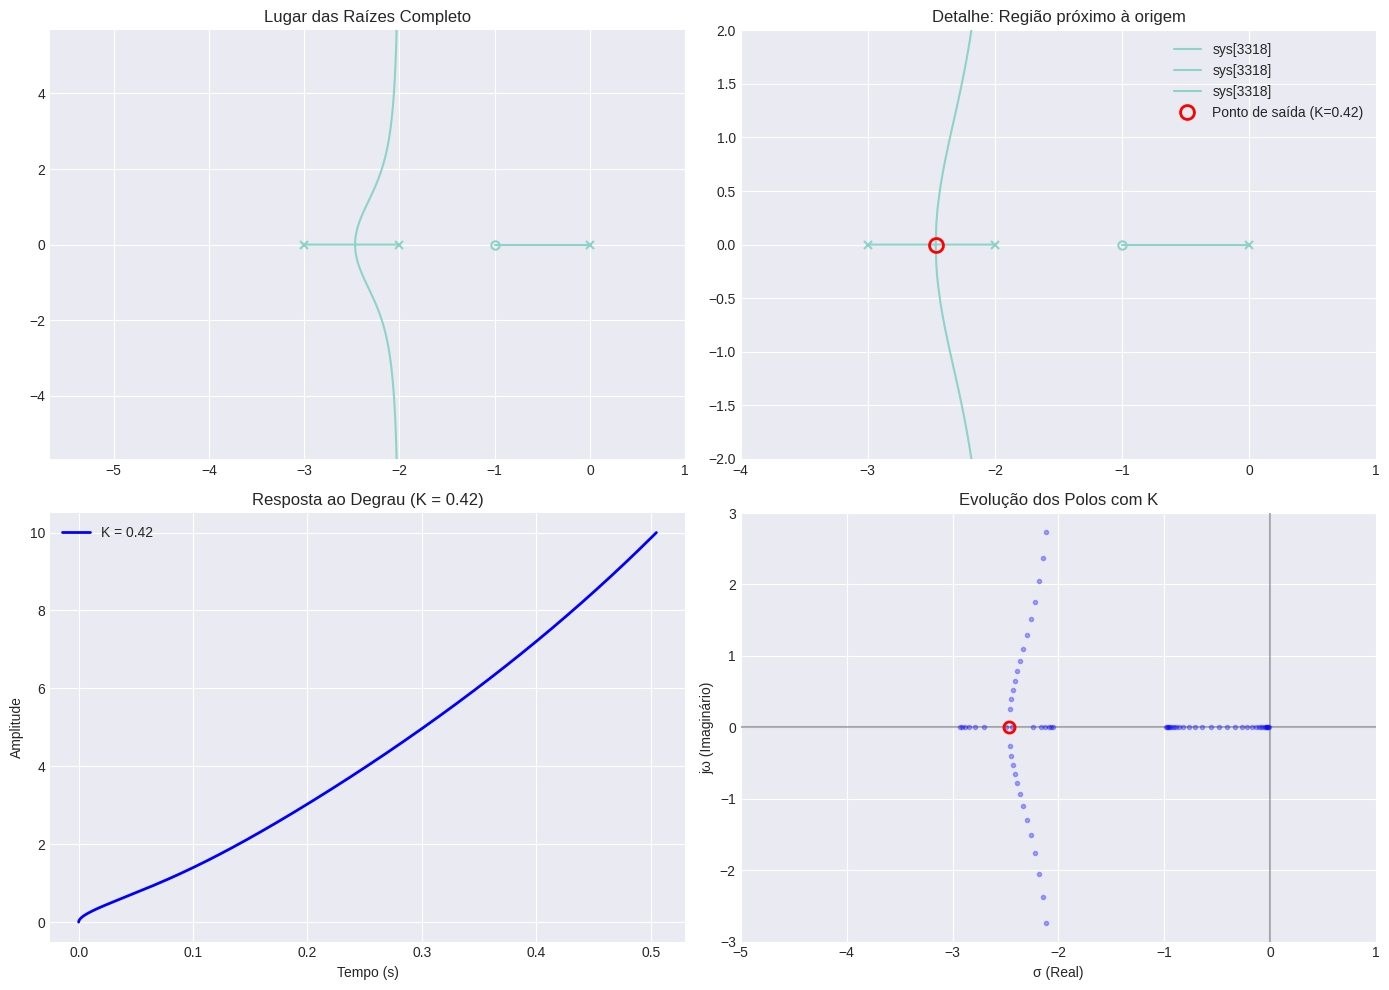


Soluções completas da equação dK/ds = 0:
  Solução 1: (-0.767214384061616+0.7925519925154478j)
  Solução 2: (-0.767214384061616-0.7925519925154478j)
  Solução 3: (-2.465571231876768+0j)

Verificação numérica do ponto de saída:
  Ponto de saída aproximado: s ≈ -2.465, K ≈ 0.419


In [36]:
# ============================================================================
# EXEMPLO 2: Sistema de 3ª Ordem com Zero
# G(s)H(s) = K(s+1) / [s(s+2)(s+3)]
# ============================================================================

print("\n" + "=" * 70)
print("EXEMPLO 2: Sistema de 3ª Ordem com Zero")
print("G(s)H(s) = K(s+1) / [s(s+2)(s+3)]")
print("=" * 70)

num2 = [1, 1]  # s + 1
den2 = [1, 5, 6, 0]  # s(s+2)(s+3) = s³ + 5s² + 6s
sys2 = cm.tf(num2, den2)

print(f"Função de Transferência: {sys2}")
print(f"Polos: {cm.pole(sys2)}")
print(f"Zeros: {cm.zero(sys2)}")

fig2, axs2 = plt.subplots(2, 2, figsize=(14, 10))

# 1. Lugar das raízes completo
cm.rlocus(sys2, ax=axs2[0, 0], grid=True)
axs2[0, 0].set_title('Lugar das Raízes Completo')

# 2. Detalhe da região de interesse
cm.rlocus(sys2, ax=axs2[0, 1], grid=True)
axs2[0, 1].set_title('Detalhe: Região próximo à origem')
axs2[0, 1].set_xlim([-4, 1])
axs2[0, 1].set_ylim([-2, 2])

# Cálculo analítico do ponto de saída - CORRIGIDO
s = sp.symbols('s')
K_expr = -s*(s+2)*(s+3)/(s+1)
dKds = sp.diff(K_expr, s)

# Resolver a equação dK/ds = 0
break_equation = sp.Eq(dKds, 0)
break_points = sp.solve(break_equation, s)

print("\nAnálise dos Pontos de Saída:")
real_break_points = []

# Converter soluções sympy para numéricas e filtrar
for bp in break_points:
    try:
        # Converter para número complexo
        bp_num = complex(bp.evalf())

        # Verificar se é real (parte imaginária próxima de zero) e negativo
        if abs(bp_num.imag) < 1e-10 and bp_num.real < 0:
            real_bp = float(bp_num.real)
            real_break_points.append(real_bp)

            # Calcular K no ponto de saída
            K_val = -real_bp*(real_bp+2)*(real_bp+3)/(real_bp+1)
            print(f"  s = {real_bp:.3f}, K = {K_val:.3f}")

            # Marcar no gráfico
            axs2[0, 1].plot(real_bp, 0, 'ro', markersize=10,
                           markerfacecolor='none', markeredgewidth=2,
                           label=f'Ponto de saída (K={K_val:.2f})' if len(real_break_points)==1 else "")

    except Exception as e:
        print(f"  Erro ao processar solução {bp}: {e}")

# Adicionar legenda se houver pontos
if real_break_points:
    axs2[0, 1].legend()

# 3. Resposta ao degrau para K = ponto de saída
if real_break_points:
    # Usar o primeiro ponto de saída encontrado
    real_bp = real_break_points[0]
    K_break = -real_bp*(real_bp+2)*(real_bp+3)/(real_bp+1)

    print(f"\nK no ponto de saída: {K_break:.3f}")

    sys_cl_break = cm.feedback(K_break * sys2, 1)
    t, y_break = cm.step(sys_cl_break, T=np.linspace(0, 10, 500))

    axs2[1, 0].plot(t, y_break, 'b-', linewidth=2, label=f'K = {K_break:.2f}')
    axs2[1, 0].set_title(f'Resposta ao Degrau (K = {K_break:.2f})')
    axs2[1, 0].set_xlabel('Tempo (s)')
    axs2[1, 0].set_ylabel('Amplitude')
    axs2[1, 0].grid(True)
    axs2[1, 0].legend()

    # Calcular especificações da resposta
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(y_break)
    if len(peaks) > 0:
        overshoot = (y_break[peaks[0]] - 1) * 100 if y_break[peaks[0]] > 1 else 0
        # Tempo de assentamento (2%)
        final_value = y_break[-1]
        settling_idx = np.where(np.abs(y_break - final_value) > 0.02*final_value)[0]
        settling_time = t[settling_idx[-1]] if len(settling_idx) > 0 else t[-1]

        axs2[1, 0].text(0.05, 0.95, f'Overshoot: {overshoot:.1f}%\nT_s(2%): {settling_time:.2f}s',
                       transform=axs2[1, 0].transAxes,
                       verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
else:
    axs2[1, 0].text(0.5, 0.5, 'Sem ponto de saída no eixo real',
                   transform=axs2[1, 0].transAxes,
                   ha='center', va='center', fontsize=12)

# 4. Polos para múltiplos valores de K
axs2[1, 1].set_xlim([-5, 1])
axs2[1, 1].set_ylim([-3, 3])
axs2[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axs2[1, 1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axs2[1, 1].set_title('Evolução dos Polos com K')
axs2[1, 1].set_xlabel('σ (Real)')
axs2[1, 1].set_ylabel('jω (Imaginário)')

K_range = np.logspace(-1, 2, 30)  # K de 0.1 a 100
for K in K_range:
    sys_cl = cm.feedback(K * sys2, 1)
    poles = cm.pole(sys_cl)
    axs2[1, 1].plot(poles.real, poles.imag, 'o',
                   alpha=0.3, markersize=3, color='blue')

# Destacar pontos importantes
if real_break_points:
    for bp in real_break_points:
        axs2[1, 1].plot(bp, 0, 'ro', markersize=8,
                       markerfacecolor='none', markeredgewidth=2)

plt.tight_layout()
plt.show()

# Análise adicional dos pontos de saída
print("\nSoluções completas da equação dK/ds = 0:")
for i, bp in enumerate(break_points):
    try:
        bp_num = complex(bp.evalf())
        print(f"  Solução {i+1}: {bp_num}")
    except:
        print(f"  Solução {i+1}: {bp} (não avaliável numericamente)")

# Verificar manualmente o ponto de saída aproximado
print("\nVerificação numérica do ponto de saída:")
sigma_range = np.linspace(-3, -2, 100)
K_vals = []
for sigma in sigma_range:
    K = -sigma*(sigma+2)*(sigma+3)/(sigma+1)
    K_vals.append(K)

# Encontrar máximo
max_idx = np.argmax(K_vals)
sigma_max = sigma_range[max_idx]
K_max = K_vals[max_idx]
print(f"  Ponto de saída aproximado: s ≈ {sigma_max:.3f}, K ≈ {K_max:.3f}")


EXEMPLO 3: Sistema de 4ª Ordem com Polos Complexos
G(s) = K / [s(s+4)(s+4+4j)(s+4-4j)]
Polos em malha aberta: [-4.+4.j -4.-4.j -4.+0.j  0.+0.j]
Ordem do sistema: 4
Centro das assíntotas: σ_A = -3.00

Para K = 50:
  Polo dominante: -4.234+3.825j
  ζ = 0.742, ω_n = 5.705


/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")


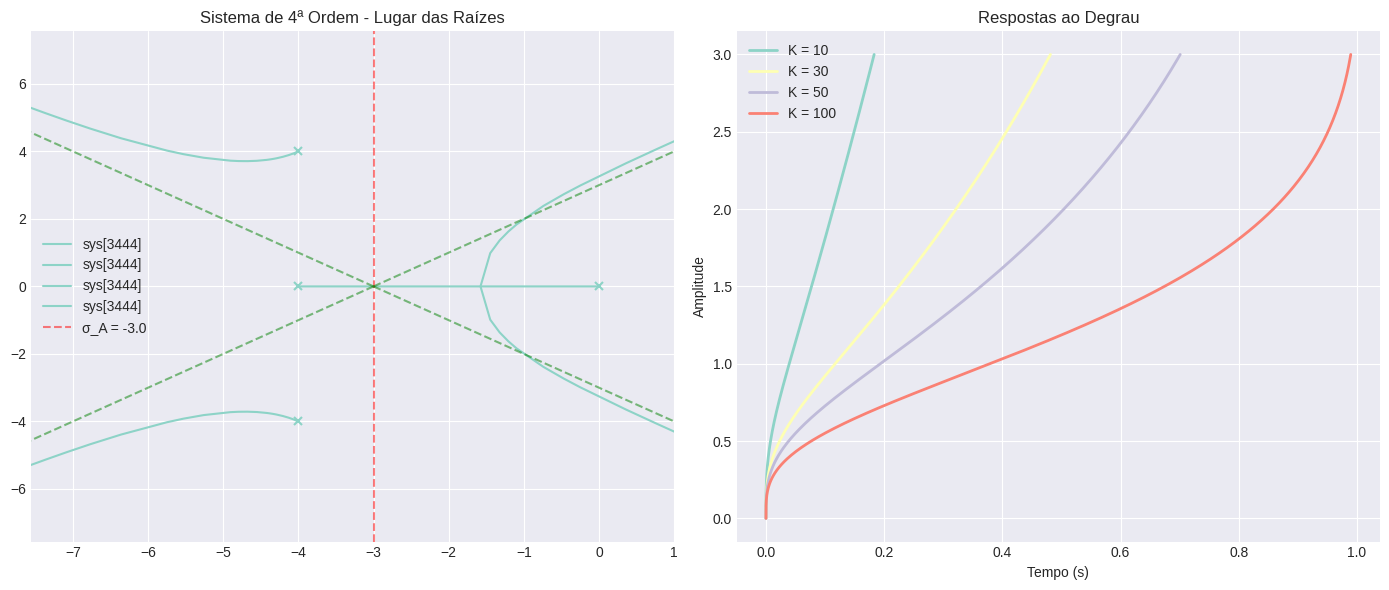

In [37]:

# ============================================================================
# EXEMPLO 3: Sistema de 4ª Ordem
# G(s) = K / [s(s+4)(s+4+4j)(s+4-4j)]
# ============================================================================

print("\n" + "=" * 70)
print("EXEMPLO 3: Sistema de 4ª Ordem com Polos Complexos")
print("G(s) = K / [s(s+4)(s+4+4j)(s+4-4j)]")
print("=" * 70)

# Definir polos
polo1 = 0
polo2 = -4
polo3 = -4 + 4j
polo4 = -4 - 4j

# Criar função de transferência
den3 = np.poly([polo1, polo2, polo3, polo4])
num3 = [1]
sys3 = cm.tf(num3, den3)

print(f"Polos em malha aberta: {cm.pole(sys3)}")
print(f"Ordem do sistema: {len(cm.pole(sys3))}")

# Calcular centro das assíntotas
centro = (0 + (-4) + (-4+4j) + (-4-4j)).real / 4
print(f"Centro das assíntotas: σ_A = {centro:.2f}")

fig3, axs3 = plt.subplots(1, 2, figsize=(14, 6))

# 1. Lugar das raízes completo
cm.rlocus(sys3, ax=axs3[0], grid=True)
axs3[0].set_title('Sistema de 4ª Ordem - Lugar das Raízes')
axs3[0].axvline(x=centro, color='r', linestyle='--', alpha=0.5, label=f'σ_A = {centro:.1f}')

# Desenhar assíntotas
angles = [45, 135, 225, 315]  # (2q+1)*180/4
for angle in angles:
    theta = np.radians(angle)
    x_end = centro + 10 * np.cos(theta)
    y_end = 10 * np.sin(theta)
    axs3[0].plot([centro, x_end], [0, y_end], 'g--', alpha=0.5)

axs3[0].legend()

# 2. Resposta ao degrau para K que dá ζ ≈ 0.7
# Encontrar K que coloca polos na linha de 45°
K_test = 50
sys_cl3 = cm.feedback(K_test * sys3, 1)
poles_cl = cm.pole(sys_cl3)

# Encontrar polos complexos dominantes
complex_poles = [p for p in poles_cl if np.imag(p) != 0]
if complex_poles:
    dominant_pole = complex_poles[0]
    ζ = -np.real(dominant_pole) / np.abs(dominant_pole)
    ω_n = np.abs(dominant_pole)
    print(f"\nPara K = {K_test}:")
    print(f"  Polo dominante: {dominant_pole:.3f}")
    print(f"  ζ = {ζ:.3f}, ω_n = {ω_n:.3f}")

# Respostas para diferentes K
K_vals = [10, 30, 50, 100]
for K in K_vals:
    sys_cl = cm.feedback(K * sys3, 1)
    t, y = cm.step(sys_cl, T=np.linspace(0, 3, 500))
    axs3[1].plot(t, y, linewidth=2, label=f'K = {K}')

axs3[1].set_title('Respostas ao Degrau')
axs3[1].set_xlabel('Tempo (s)')
axs3[1].set_ylabel('Amplitude')
axs3[1].legend()
axs3[1].grid(True)

plt.tight_layout()
plt.show()


EXEMPLO 4: Sistema com Controlador PD
Processo: G(s) = 1/[s(s+2)]
Controlador: Gc(s) = K(s+3)
Processo: <TransferFunction>: sys[3469]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      1
  ---------
  s^2 + 2 s
Controlador PD: Gc(s) = 1(s+3)
Sistema em malha aberta: <TransferFunction>: sys[3471]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    s + 3
  ---------
  s^2 + 2 s


/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")


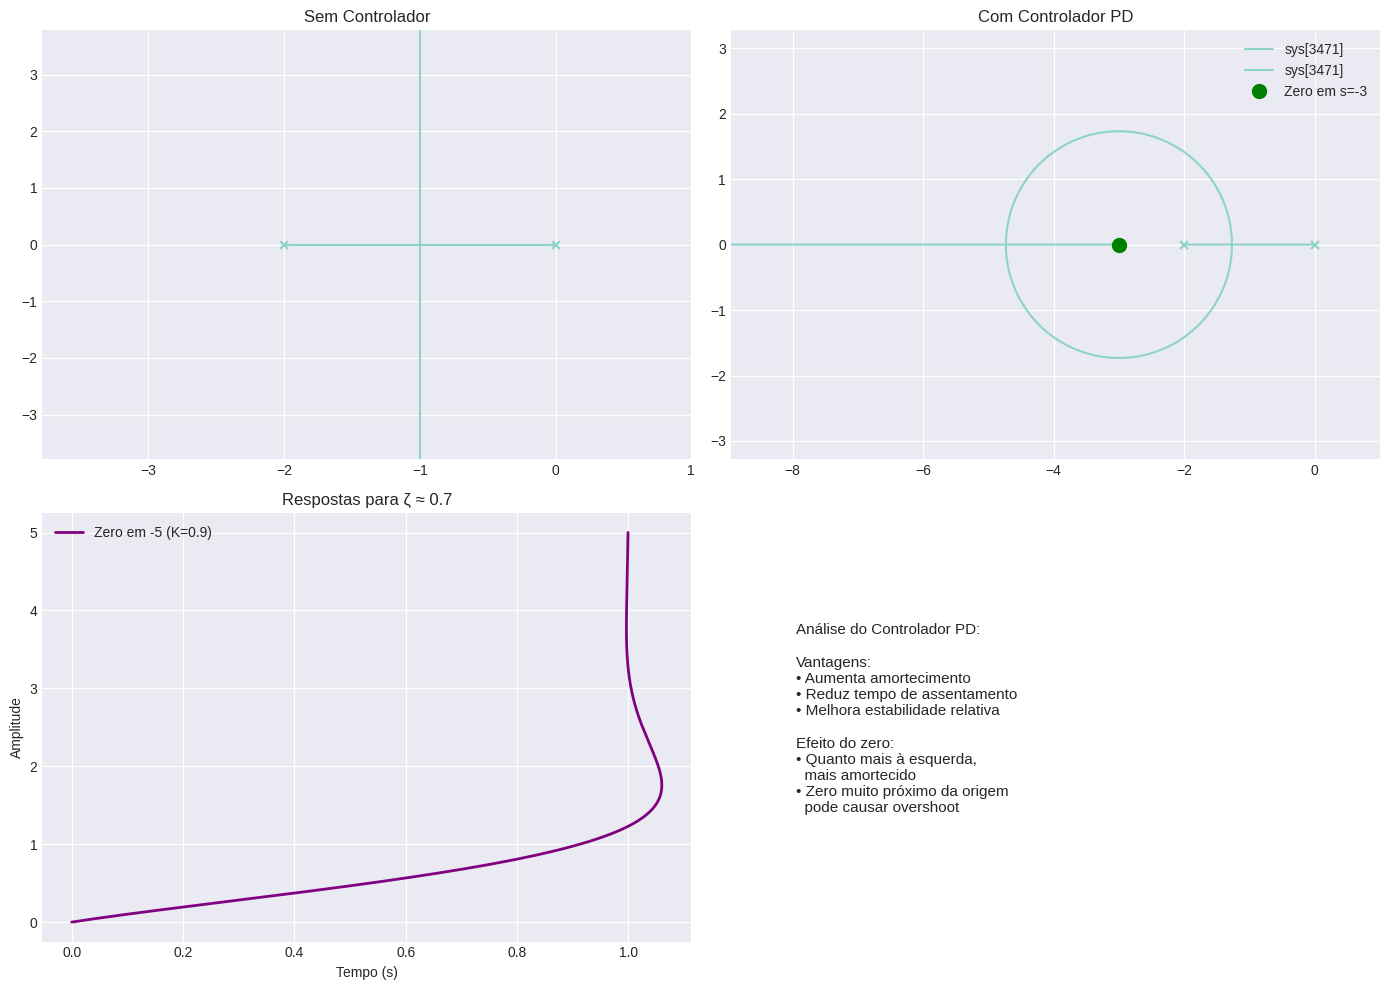

In [38]:

# ============================================================================
# EXEMPLO 4: Sistema com Controlador PD
# G(s) = 1/[s(s+2)], Gc(s) = K(s+3)
# ============================================================================

print("\n" + "=" * 70)
print("EXEMPLO 4: Sistema com Controlador PD")
print("Processo: G(s) = 1/[s(s+2)]")
print("Controlador: Gc(s) = K(s+3)")
print("=" * 70)

# Processo
G_process = cm.tf([1], [1, 2, 0])

# Controlador PD: Gc(s) = K(s+z) = K(s+3)
z = 3
K_pd = 1  # Ganho inicial

# Sistema em malha aberta
G_open = cm.tf([K_pd, K_pd*z], [1]) * G_process

print(f"Processo: {G_process}")
print(f"Controlador PD: Gc(s) = {K_pd}(s+{z})")
print(f"Sistema em malha aberta: {G_open}")

fig4, axs4 = plt.subplots(2, 2, figsize=(14, 10))

# 1. Comparação: sem e com controlador
cm.rlocus(G_process, ax=axs4[0, 0], grid=True)
axs4[0, 0].set_title('Sem Controlador')

cm.rlocus(G_open, ax=axs4[0, 1], grid=True)
axs4[0, 1].set_title('Com Controlador PD')
axs4[0, 1].plot(-z, 0, 'go', markersize=10, label=f'Zero em s=-{z}')
axs4[0, 1].legend()

# 2. Efeito da posição do zero
zero_positions = [1, 2, 3, 5]
colors = ['blue', 'green', 'red', 'purple']

for z_pos, color in zip(zero_positions, colors):
    Gc = cm.tf([1, z_pos], [1])
    G_open_z = Gc * G_process

    # Encontrar K para ζ = 0.7 (aproximado)
    # Buscar no lugar das raízes
    K_range = np.linspace(0.1, 20, 100)
    for K in K_range:
        sys_cl = cm.feedback(K * G_open_z, 1)
        poles = cm.pole(sys_cl)
        complex_poles = [p for p in poles if np.imag(p) != 0]
        if complex_poles:
            ζ = -np.real(complex_poles[0]) / np.abs(complex_poles[0])
            if abs(ζ - 0.7) < 0.02:
                t, y = cm.step(sys_cl, T=np.linspace(0, 5, 500))
                axs4[1, 0].plot(t, y, color=color, linewidth=2,
                               label=f'Zero em -{z_pos} (K={K:.1f})')
                break

axs4[1, 0].set_title('Respostas para ζ ≈ 0.7')
axs4[1, 0].set_xlabel('Tempo (s)')
axs4[1, 0].set_ylabel('Amplitude')
axs4[1, 0].legend()
axs4[1, 0].grid(True)

# 3. Análise de desempenho
axs4[1, 1].axis('off')
performance_text = "Análise do Controlador PD:\n\n"
performance_text += "Vantagens:\n"
performance_text += "• Aumenta amortecimento\n"
performance_text += "• Reduz tempo de assentamento\n"
performance_text += "• Melhora estabilidade relativa\n\n"
performance_text += "Efeito do zero:\n"
performance_text += "• Quanto mais à esquerda,\n  mais amortecido\n"
performance_text += "• Zero muito próximo da origem\n  pode causar overshoot\n"

axs4[1, 1].text(0.1, 0.5, performance_text, fontsize=11,
                verticalalignment='center', family='sans-serif')

plt.tight_layout()
plt.show()


EXEMPLO 5: Análise de Sensibilidade das Raízes
Sistema: G(s) = K / [s(s+1)]

Cálculo de Sensibilidade Numérica:
----------------------------------------
Polo nominal (K=2): -0.5000+1.3229j
Polo com K=2.2: -0.5000+1.3964j
Variação Δr: 0.0000+0.0735j
Sensibilidade S_K^r: 0.0000+0.7355j
Magnitude: 0.7355
Ângulo: 90.0°


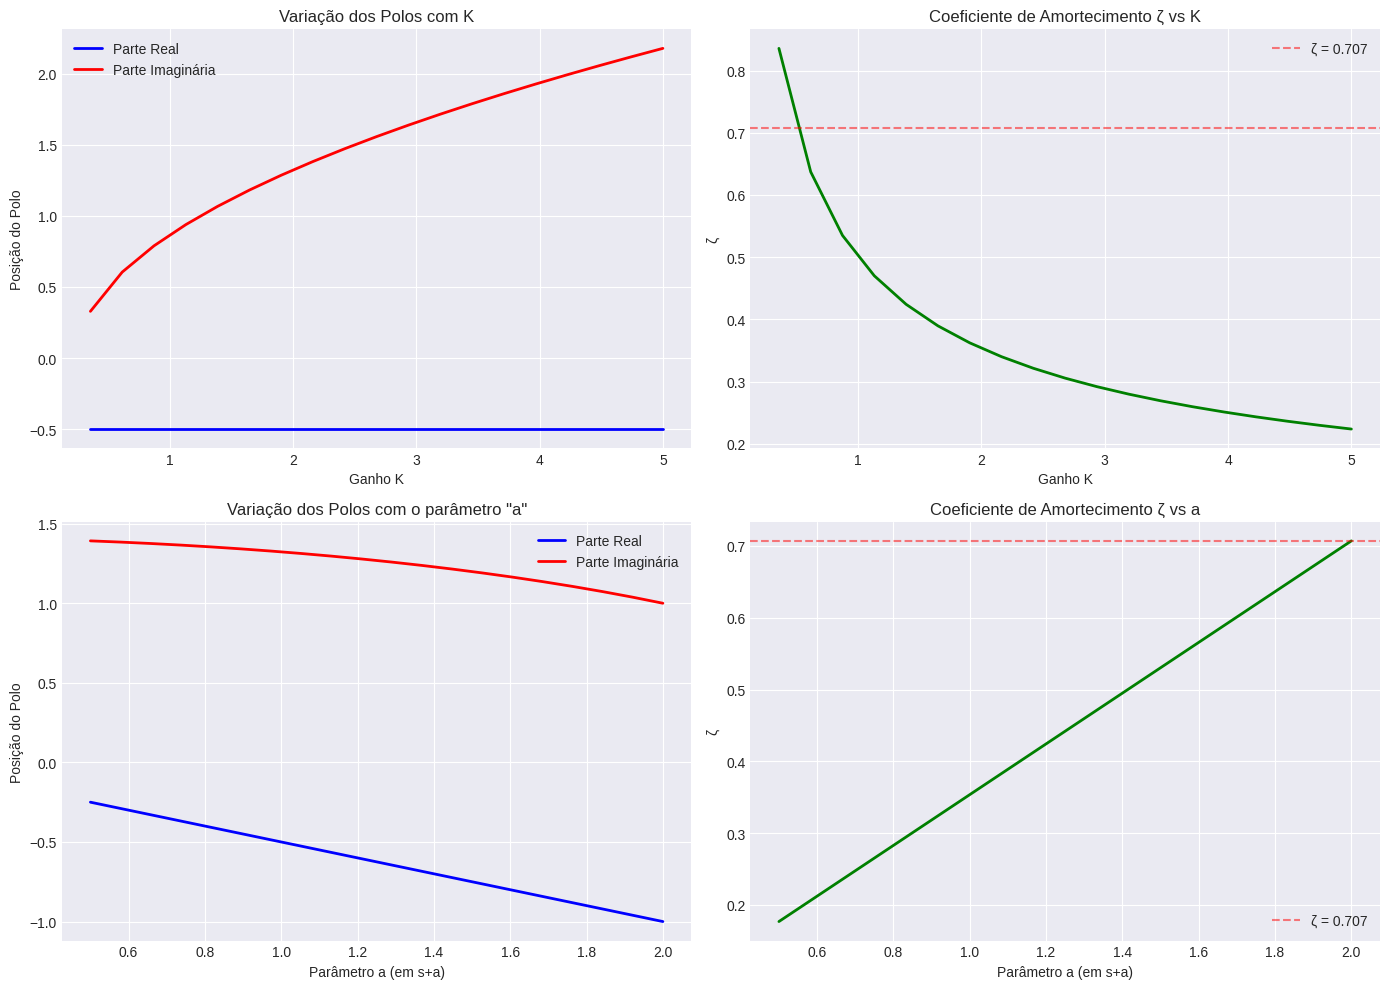

In [39]:

# ============================================================================
# EXEMPLO 5: Análise de Sensibilidade
# Sistema: G(s) = K / [s(s+1)], com variação de parâmetro
# ============================================================================

print("\n" + "=" * 70)
print("EXEMPLO 5: Análise de Sensibilidade das Raízes")
print("Sistema: G(s) = K / [s(s+1)]")
print("=" * 70)

# Sistema nominal
sys5_nominal = cm.tf([1], [1, 1, 0])
K_nominal = 2

# Função para calcular sensibilidade
def analyze_sensitivity(sys_tf, K_nom, param_name, param_values):
    """Analisa sensibilidade para diferentes parâmetros"""

    results = []

    for param_val in param_values:
        if param_name == 'K':
            # Variação no ganho
            sys_cl = cm.feedback(param_val * sys_tf, 1)
        elif param_name == 'pole':
            # Variação na posição do polo
            den_modified = [1, param_val, 0]
            sys_modified = cm.tf([1], den_modified)
            sys_cl = cm.feedback(K_nom * sys_modified, 1)

        poles = cm.pole(sys_cl)

        # Encontrar polo complexo (se existir)
        complex_poles = [p for p in poles if np.imag(p) != 0]
        if complex_poles:
            dominant_pole = complex_poles[0]
            ζ = -np.real(dominant_pole) / np.abs(dominant_pole)
            ω_n = np.abs(dominant_pole)
            results.append({
                'param': param_val,
                'pole': dominant_pole,
                'zeta': ζ,
                'omega_n': ω_n
            })

    return results

# Análise para variação em K
K_values = np.linspace(0.1, 5, 20)
results_K = analyze_sensitivity(sys5_nominal, K_nominal, 'K', K_values)

# Análise para variação no polo (s+1) -> (s+a)
a_values = np.linspace(0.5, 2, 20)
results_a = analyze_sensitivity(sys5_nominal, K_nominal, 'pole', a_values)

fig5, axs5 = plt.subplots(2, 2, figsize=(14, 10))

# 1. Sensibilidade ao ganho K
if results_K:
    K_vals = [r['param'] for r in results_K]
    poles_real = [np.real(r['pole']) for r in results_K]
    poles_imag = [np.imag(r['pole']) for r in results_K]
    zeta_vals = [r['zeta'] for r in results_K]

    axs5[0, 0].plot(K_vals, poles_real, 'b-', linewidth=2, label='Parte Real')
    axs5[0, 0].plot(K_vals, poles_imag, 'r-', linewidth=2, label='Parte Imaginária')
    axs5[0, 0].set_title('Variação dos Polos com K')
    axs5[0, 0].set_xlabel('Ganho K')
    axs5[0, 0].set_ylabel('Posição do Polo')
    axs5[0, 0].legend()
    axs5[0, 0].grid(True)

    axs5[0, 1].plot(K_vals, zeta_vals, 'g-', linewidth=2)
    axs5[0, 1].set_title('Coeficiente de Amortecimento ζ vs K')
    axs5[0, 1].set_xlabel('Ganho K')
    axs5[0, 1].set_ylabel('ζ')
    axs5[0, 1].grid(True)
    axs5[0, 1].axhline(y=0.707, color='r', linestyle='--', alpha=0.5, label='ζ = 0.707')
    axs5[0, 1].legend()

# 2. Sensibilidade ao parâmetro 'a'
if results_a:
    a_vals = [r['param'] for r in results_a]
    poles_real_a = [np.real(r['pole']) for r in results_a]
    poles_imag_a = [np.imag(r['pole']) for r in results_a]
    zeta_vals_a = [r['zeta'] for r in results_a]

    axs5[1, 0].plot(a_vals, poles_real_a, 'b-', linewidth=2, label='Parte Real')
    axs5[1, 0].plot(a_vals, poles_imag_a, 'r-', linewidth=2, label='Parte Imaginária')
    axs5[1, 0].set_title('Variação dos Polos com o parâmetro "a"')
    axs5[1, 0].set_xlabel('Parâmetro a (em s+a)')
    axs5[1, 0].set_ylabel('Posição do Polo')
    axs5[1, 0].legend()
    axs5[1, 0].grid(True)

    axs5[1, 1].plot(a_vals, zeta_vals_a, 'g-', linewidth=2)
    axs5[1, 1].set_title('Coeficiente de Amortecimento ζ vs a')
    axs5[1, 1].set_xlabel('Parâmetro a (em s+a)')
    axs5[1, 1].set_ylabel('ζ')
    axs5[1, 1].grid(True)
    axs5[1, 1].axhline(y=0.707, color='r', linestyle='--', alpha=0.5, label='ζ = 0.707')
    axs5[1, 1].legend()

# Cálculo numérico da sensibilidade
print("\nCálculo de Sensibilidade Numérica:")
print("-" * 40)

# Para K = 2
sys_cl_nom = cm.feedback(2 * sys5_nominal, 1)
poles_nom = cm.pole(sys_cl_nom)
complex_pole_nom = [p for p in poles_nom if np.imag(p) != 0][0]

# Variação de 10% em K
sys_cl_plus = cm.feedback(2.2 * sys5_nominal, 1)
poles_plus = cm.pole(sys_cl_plus)
complex_pole_plus = [p for p in poles_plus if np.imag(p) != 0][0]

Δr = complex_pole_plus - complex_pole_nom
ΔK_rel = 0.1  # 10%
S_K = Δr / ΔK_rel

print(f"Polo nominal (K=2): {complex_pole_nom:.4f}")
print(f"Polo com K=2.2: {complex_pole_plus:.4f}")
print(f"Variação Δr: {Δr:.4f}")
print(f"Sensibilidade S_K^r: {S_K:.4f}")
print(f"Magnitude: {abs(S_K):.4f}")
print(f"Ângulo: {np.angle(S_K, deg=True):.1f}°")

plt.tight_layout()
plt.show()


# RESUMO FINAL

## EXEMPLO 1: Sistema de 2ª Ordem
• Demonstra conceitos básicos do lugar das raízes
• Mostra relação entre K e posição dos polos
• Visualiza linha de ζ constante

## EXEMPLO 2: Sistema de 3ª Ordem com Zero
• Ilustra efeito de zeros no lugar das raízes
• Calcula ponto de saída analiticamente
• Mostra evolução dos polos com K

## EXEMPLO 3: Sistema de 4ª Ordem
• Demonstra sistema de ordem superior
• Calcula e mostra assíntotas
• Analisa polos dominantes

## EXEMPLO 4: Controlador PD
• Mostra efeito de adicionar zero
• Compara sistema com/sem controlador
• Analisa desempenho para diferentes zeros

## EXEMPLO 5: Análise de Sensibilidade
• Quantifica sensibilidade das raízes
• Analisa variações paramétricas
• Mostra importância da robustez



COMPARAÇÃO DE DIFERENTES SISTEMAS


/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
/home/andersonbraz/PycharmProjects/JupyterProject/.venv/lib/python3.10/site-packages/control/rlocus.py:202: FutureWarn

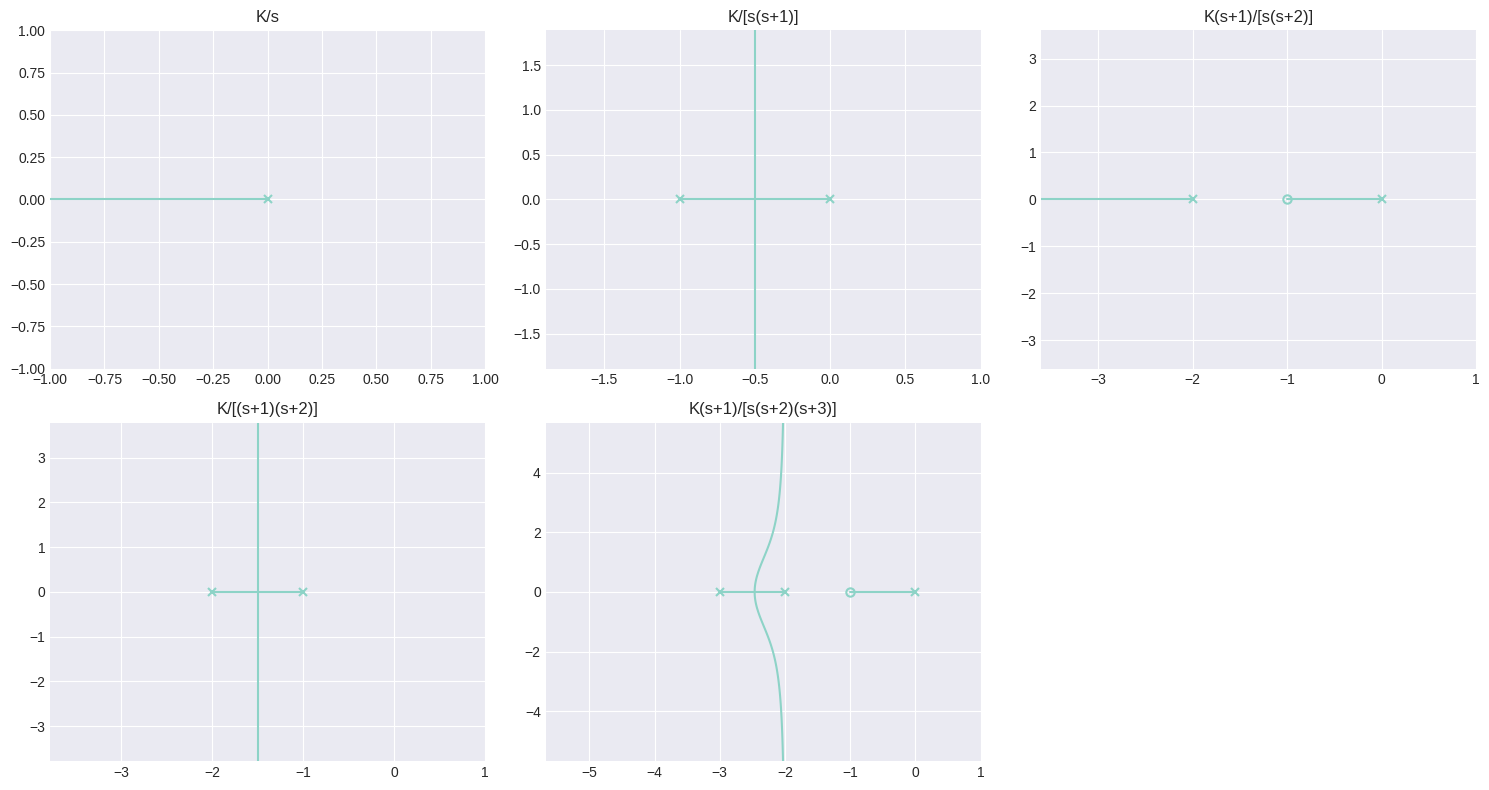


FIM DOS EXEMPLOS - CAPÍTULO 7


In [40]:

# ============================================================================
# FUNÇÃO UTILITÁRIA: Plotar múltiplos sistemas
# ============================================================================

def plot_multiple_systems(systems_dict):
    """Plota lugar das raízes para múltiplos sistemas"""
    n_systems = len(systems_dict)
    n_cols = min(3, n_systems)
    n_rows = (n_systems + n_cols - 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

    if n_systems == 1:
        axs = [axs]
    elif isinstance(axs, np.ndarray):
        axs = axs.flatten()

    for idx, (name, sys) in enumerate(systems_dict.items()):
        if idx < len(axs):
            cm.rlocus(sys, ax=axs[idx], grid=True)
            axs[idx].set_title(name)

    # Esconder eixos vazios
    for idx in range(len(systems_dict), len(axs)):
        axs[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Exemplo de uso da função utilitária
print("\n" + "=" * 70)
print("COMPARAÇÃO DE DIFERENTES SISTEMAS")
print("=" * 70)

# Criar alguns sistemas para comparação
systems_to_compare = {
    'K/s': cm.tf([1], [1, 0]),
    'K/[s(s+1)]': cm.tf([1], [1, 1, 0]),
    'K(s+1)/[s(s+2)]': cm.tf([1, 1], [1, 2, 0]),
    'K/[(s+1)(s+2)]': cm.tf([1], [1, 3, 2]),
    'K(s+1)/[s(s+2)(s+3)]': cm.tf([1, 1], [1, 5, 6, 0])
}

plot_multiple_systems(systems_to_compare)

print("\n" + "=" * 70)
print("FIM DOS EXEMPLOS - CAPÍTULO 7")
print("=" * 70)

# Capítulo 7 - Método do Lugar das Raízes
## Estudo Dirigido - Resumo Final

## 📋 Resumo dos Conceitos Principais

### 1. Conceito Fundamental
O **método do lugar das raízes** é uma técnica gráfica que mostra como as raízes da equação característica de um sistema de controle se deslocam no **plano s** quando um parâmetro (geralmente o ganho K) varia de **0 a ∞**.

**Equação característica**: `1 + KG(s) = 0`

### 2. Condições do Lugar das Raízes
- **Condição de módulo**: `|KG(s)| = 1`
- **Condição de ângulo**: `∠KG(s) = 180° ± k·360°`

### 3. Propriedades Básicas
| Propriedade | Descrição |
|------------|-----------|
| **Início** | Nos polos de G(s) (quando K = 0) |
| **Término** | Nos zeros de G(s) (quando K → ∞) |
| **Simetria** | Em relação ao eixo real |
| **Eixo real** | À esquerda de número ímpar de polos/zeros |
| **Assíntotas** | n-m ramos vão para infinito |

### 4. Procedimento de 12 Passos
1. Escrever `1 + KP(s) = 0`
2. Fatorar em polos e zeros
3. Marcar polos (×) e zeros (○)
4. Determinar segmentos no eixo real
5. Determinar número de ramos (= nº de polos)
6. Verificar simetria
7. Calcular assíntotas:
   - Centro: `σₐ = (Σpolos - Σzeros)/(n-m)`
   - Ângulos: `φₐ = (2q+1)180°/(n-m)`
8. Cruzamento com eixo jω (Routh-Hurwitz)
9. Pontos de saída: `dK/ds = 0`
10. Ângulos de partida/chegada
11. Verificar pontos com condição de ângulo
12. Calcular K em pontos específicos

### 5. Aplicações Práticas
| Aplicação | Objetivo |
|-----------|----------|
| **Análise de estabilidade** | Determinar faixa de ganho estável |
| **Projeto de controladores** | Ajustar P, PI, PD, PID |
| **Análise de sensibilidade** | Avaliar robustez do sistema |
| **Resposta transitória** | Prever overshoot, tempo de assentamento |

### 6. Tipos de Sistemas Analisados
1. **Sistema de 2ª ordem** - Conceitos fundamentais
2. **Sistema com zero** - Efeito de zeros no lugar
3. **Sistema de ordem superior** - Assíntotas e polos dominantes
4. **Sistema com controlador** - Projeto de compensadores
5. **Análise de sensibilidade** - Variações paramétricas

### 7. Ferramentas Computacionais
- **MATLAB**: `rlocus`, `rlocfind`, `pole`, `zero`
- **Python**: Biblioteca `control` (`control.matlab`)
- **Scilab/Octave**: Funções similares ao MATLAB

### 8. Limitações do Método
- Aplicável apenas a **sistemas lineares**
- Requer **funções racionais** (polinômios)
- Análise principalmente **qualitativa**
- Para sistemas com atraso, requer aproximações

---

## 🎬 Recursos em Vídeo - Método do Lugar das Raízes

### Vídeo 1: Introdução e Conceitos Básicos
[![Introdução ao Lugar das Raízes](https://img.youtube.com/vi/sG7_6-_hec4/0.jpg)](https://www.youtube.com/watch?v=sG7_6-_hec4)
**Título**: Introdução ao Método do Lugar das Raízes
**Duração**: 15 minutos
**Conteúdo**: Conceitos fundamentais, condições de módulo e ângulo
**Link**: https://www.youtube.com/watch?v=sG7_6-_hec4

### Vídeo 2: Traçado Passo a Passo
[![Traçado Passo a Passo](https://img.youtube.com/vi/wHk8x9JLUd0/0.jpg)](https://www.youtube.com/watch?v=wHk8x9JLUd0)
**Título**: Como Traçar o Lugar das Raízes - Passo a Passo
**Duração**: 22 minutos
**Conteúdo**: Procedimento completo dos 12 passos com exemplos
**Link**: https://www.youtube.com/watch?v=wHk8x9JLUd0

### Vídeo 3: Exemplos com MATLAB
[![Exemplos com MATLAB](https://img.youtube.com/vi/6tqzaL1Np8A/0.jpg)](https://www.youtube.com/watch?v=6tqzaL1Np8A)
**Título**: Lugar das Raízes no MATLAB - Exemplos Práticos
**Duração**: 18 minutos
**Conteúdo**: Implementação no MATLAB, funções rlocus e rlocfind
**Link**: https://www.youtube.com/watch?v=6tqzaL1Np8A

### Vídeo 4: Projeto de Controladores
[![Projeto de Controladores](https://img.youtube.com/vi/FZd_8oV-1R4/0.jpg)](https://www.youtube.com/watch?v=FZd_8oV-1R4)
**Título**: Projeto de Controladores PID usando Lugar das Raízes
**Duração**: 25 minutos
**Conteúdo**: Como projetar controladores P, PI, PD, PID
**Link**: https://www.youtube.com/watch?v=FZd_8oV-1R4

### Vídeo 5: Aplicações Práticas
[![Aplicações Práticas](https://img.youtube.com/vi/XbEJ-nyQm4o/0.jpg)](https://www.youtube.com/watch?v=XbEJ-nyQm4o)
**Título**: Casos Reais de Aplicação do Método
**Duração**: 20 minutos
**Conteúdo**: Exemplos de sistemas de controle reais
**Link**: https://www.youtube.com/watch?v=XbEJ-nyQm4o

### Vídeo 6: Análise de Sensibilidade
[![Análise de Sensibilidade](https://img.youtube.com/vi/UR0hOmjaHp0/0.jpg)](https://www.youtube.com/watch?v=UR0hOmjaHp0)
**Título**: Sensibilidade e Robustez no Lugar das Raízes
**Duração**: 17 minutos
**Conteúdo**: Como analisar sensibilidade a variações paramétricas
**Link**: https://www.youtube.com/watch?v=UR0hOmjaHp0

---

## 📚 Recursos Adicionais

### Livros Recomendados
1. **Dorf & Bishop** - *Sistemas de Controle Modernos* (Capítulo 7)
2. **Ogata** - *Engenharia de Controle Moderno* (Capítulo 6)
3. **Nise** - *Engenharia de Sistemas de Controle* (Capítulo 8)

### Artigos Científicos
- Evans, W. R. (1950). "Control System Synthesis by Root Locus Method"
- Truxal, J. G. (1955). "Automatic Feedback Control System Synthesis"

### Softwares para Prática
| Software | Tipo | Link |
|----------|------|------|
| **MATLAB** | Comercial | https://www.mathworks.com |
| **Python (control)** | Open Source | https://python-control.org |
| **Scilab** | Open Source | https://www.scilab.org |
| **Octave** | Open Source | https://www.gnu.org/software/octave |

---

## ✅ Pontos Chave para Memorizar

### Vantagens do Método
- ✅ Visualização gráfica intuitiva
- ✅ Projeto direto de controladores
- ✅ Análise de estabilidade rápida
- ✅ Compreensão do efeito dos parâmetros

### Limitações
- ⚠️ Apenas para sistemas lineares
- ⚠️ Requer funções racionais
- ⚠️ Análise qualitativa necessita validação numérica

### Aplicações Típicas
- 🏭 Controle de processos industriais
- 🚀 Sistemas aeroespaciais
- 🤖 Robótica e automação
- ⚡ Controle de motores e atuadores

---

## 🏁 Conclusão

O **método do lugar das raízes** é uma ferramenta fundamental na engenharia de controle que permite:

1. **Visualizar** como a estabilidade muda com o ganho
2. **Projetar** controladores de forma sistemática
3. **Analisar** a sensibilidade do sistema
4. **Prever** o desempenho dinâmico

A combinação do método analítico com ferramentas computacionais modernas (MATLAB, Python) torna esta técnica ainda mais poderosa para o projeto de sistemas de controle robustos e eficientes.

**"O lugar das raízes não é apenas um método, é uma forma de pensar sobre sistemas de controle"** - Adaptado de W. R. Evans

---
